In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [2]:
df_c = pd.read_csv(r'C:\Users\User\Desktop\playstudios\ReadMe\Data\video_count.csv') 
df_f= pd.read_csv(r'C:\Users\User\Desktop\playstudios\ReadMe\Data\video_features.csv') 

In [3]:
l_c= list(df_c.keys())
l_f= list(df_f.keys())

In [4]:
#checking data type

In [4]:
for i in  l_c:
    print (i,type(df_c[i][0]))

video_id <class 'numpy.int64'>
date <class 'str'>
count <class 'numpy.int64'>


In [5]:
for i in  l_f:
    print (i,type(df_f[i][0]))

video_id <class 'numpy.int64'>
video_length <class 'numpy.int64'>
video_language <class 'str'>
video_upload_date <class 'str'>
video_quality <class 'str'>


In [7]:
# changing data type from str to datetime 

In [5]:
df_c['date'] = pd.to_datetime(df_c['date']) 
df_f['video_upload_date'] = pd.to_datetime(df_f['video_upload_date'])

In [9]:
# let's make it OLAP style table 

In [6]:
# df_f : df_c --> one : many
df = pd.merge(left=df_c, right=df_f, how='left', left_on='video_id', right_on='video_id')


In [7]:
df = df.sort_values(by=['video_id' ,'date' ])

In [4]:
df

NameError: name 'df' is not defined

In [ ]:
#plotting the videos views over time , I used a linear regression trendline for each video

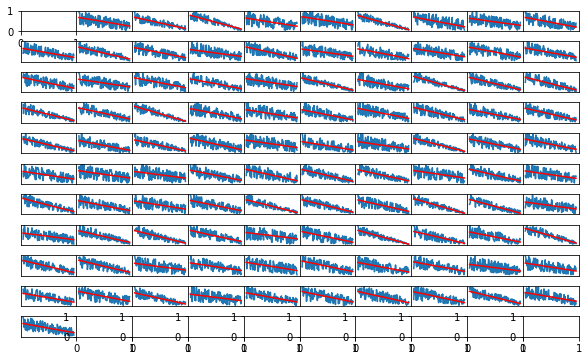

In [12]:
fig, axs = plt.subplots(11,10, figsize=(10, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
for i in range(1,101):
    
    x = np.arange(df[df['video_id']==i]['date'].size) 
    fit = np.polyfit(x, df[df['video_id']==i]['count'], 1)
    fit_fn = np.poly1d(fit)
    
    axs[i].plot(df[df['video_id']==i]['date'], df[df['video_id']==i]['count'])
    axs[i].plot(df[df['video_id']==i]['date'], fit_fn(x), 'r')
    
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [ ]:
# now we merge our slopes as derive column to df 

In [9]:
slopes = slopes.reset_index()

In [10]:
slopes.head()

,index,0
0,0,-0.417442
1,1,-0.390628
2,2,-0.336612
3,3,-0.415874
4,4,-0.347985


In [11]:
df = pd.merge(left=df, right=slopes, how='left', left_on='video_id', right_on='index')
df = df.rename(columns={0: "slope"})


    

In [12]:
(df.sum()['count']/100)  # we will use this information for our decision rule 

8978.15

In [13]:
Total_views = df.sum()['count'] 

In [14]:
ratio_views = df.groupby('video_id')['count'].sum()/Total_views proportion

In [15]:
ratio_views.sum() # good! 

1.0

In [ ]:
# remove 'p' from quality description and cast it to int 

In [17]:
df['video_quality'] = df['video_quality'].str.replace('p', '')
df['video_quality'] = pd.to_numeric(df['video_quality'])

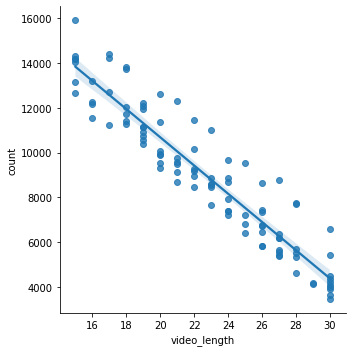

In [18]:
sns.lmplot(x='video_length', y='count', data=df.groupby(['video_id','video_length']).sum().reset_index())

In [19]:
length_by_meancount=df.groupby(['video_id','video_length']).sum().reset_index().groupby('video_length').mean()['count'].reset_index().sort_values('count')


In [20]:
Mean_length = df.groupby(['video_length','video_id']).sum().reset_index().mean()['count']


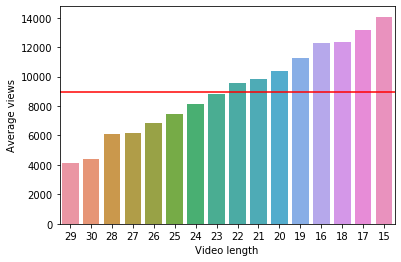

In [21]:
sns.barplot(data =length_by_meancount , x='video_length',y='count',order=length_by_meancount['video_length'])
plt.ylabel('Average views')
plt.xlabel('Video length')
plt.axhline(y=Mean_length, color='r', linestyle='-')


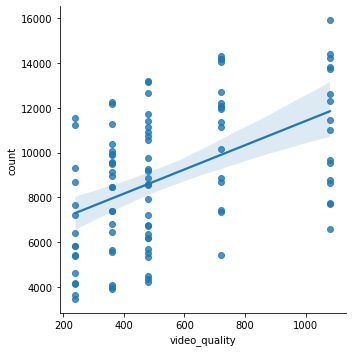

In [22]:
sns.lmplot(x='video_quality', y='count', data=df.groupby(['video_id','video_quality']).sum().reset_index())

In [23]:
df.groupby(['video_quality']).sum().reset_index()['count']
df.groupby(['video_quality','video_id']).count().reset_index().groupby('video_quality').count()['video_id']


video_quality
240     16
360     23
480     28
720     17
1080    16
Name: video_id, dtype: int64

In [24]:
mean_by_quality = df.groupby(['video_quality','video_id']).sum().reset_index().groupby('video_quality').mean().reset_index().sort_values('count')

In [25]:
Mean_quality = df.groupby(['video_quality','video_id']).sum().reset_index().mean()['count']
Mean_quality

8978.15

,video_quality,video_id,count,video_length,slope
0,240,59.187500,6523.312500,2961.687500,-45.326371
1,360,46.000000,8290.913043,2696.043478,-46.562277
2,480,45.250000,8443.821429,2764.000000,-45.287865
3,720,50.823529,11067.470588,2396.058824,-45.555368
4,1080,57.125000,11136.062500,2670.125000,-44.538432


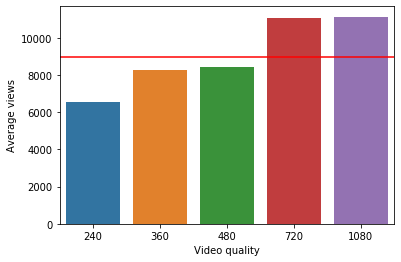

In [26]:
sns.barplot(data =mean_by_quality, x='video_quality',y='count',order=mean_by_quality['video_quality'],)
plt.ylabel('Average views')
plt.xlabel('Video quality')
plt.axhline(y=Mean_quality, color='r', linestyle='-')


In [27]:
mean_by_language = df.groupby(['video_language','video_id']).sum().reset_index().groupby('video_language').mean().reset_index().sort_values('count')

In [28]:
Mean_language = df.groupby(['video_language','video_id']).sum().reset_index().mean()['count']

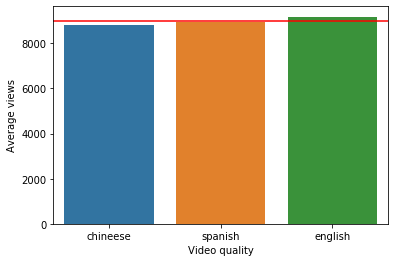

In [29]:
sns.barplot(data =mean_by_language, x='video_language',y='count',order=mean_by_language['video_language'],)
plt.ylabel('Average views')
plt.xlabel('Video quality')
plt.axhline(y=Mean_language, color='r', linestyle='-')


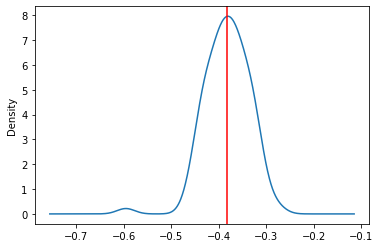

In [30]:
df.groupby('video_id')['slope'].max().reset_index()['slope'].plot.kde()
plt.axvline(x=-0.38251801196643653,color='r',label ='mean')


In [44]:
volotality = (df.groupby('video_id').std()/df.groupby('video_id').mean())['count'] 
daily_mean = df.groupby('video_id').mean()['count']

In [49]:
df_sku =  pd.merge(left=volotality.reset_index(), right=daily_mean.reset_index(), how='inner', left_on='video_id', right_on='video_id')


In [50]:

df_sku = df_sku.rename(columns={'count_x': "volatility" ,'count_y':"daily avg" })


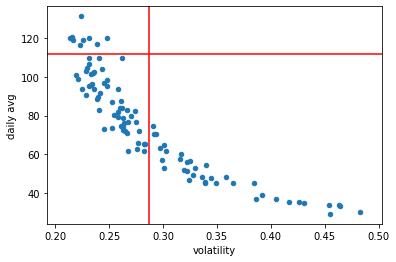

In [248]:
df_sku.plot.scatter(x='volatility',y='daily avg' )
plt.axvline(x=0.287,color='r')
plt.axhline(y=112, color='r')



In [250]:
l1 = list(df_sku[(df_sku['daily avg']<=80) & (df_sku['volatility']>0.287)]['video_id'])   

In [251]:
l2 = list(df_sku[(df_sku['daily avg']<112) & (df_sku['volatility']<=0.287)]['video_id'])

In [252]:
l3  = list(df_sku[(df_sku['daily avg']>=112) & (df_sku['volatility']<0.287)]['video_id'])

In [106]:
test = df.groupby(['video_id','date']).mean().reset_index()[['video_id','count','date']]        

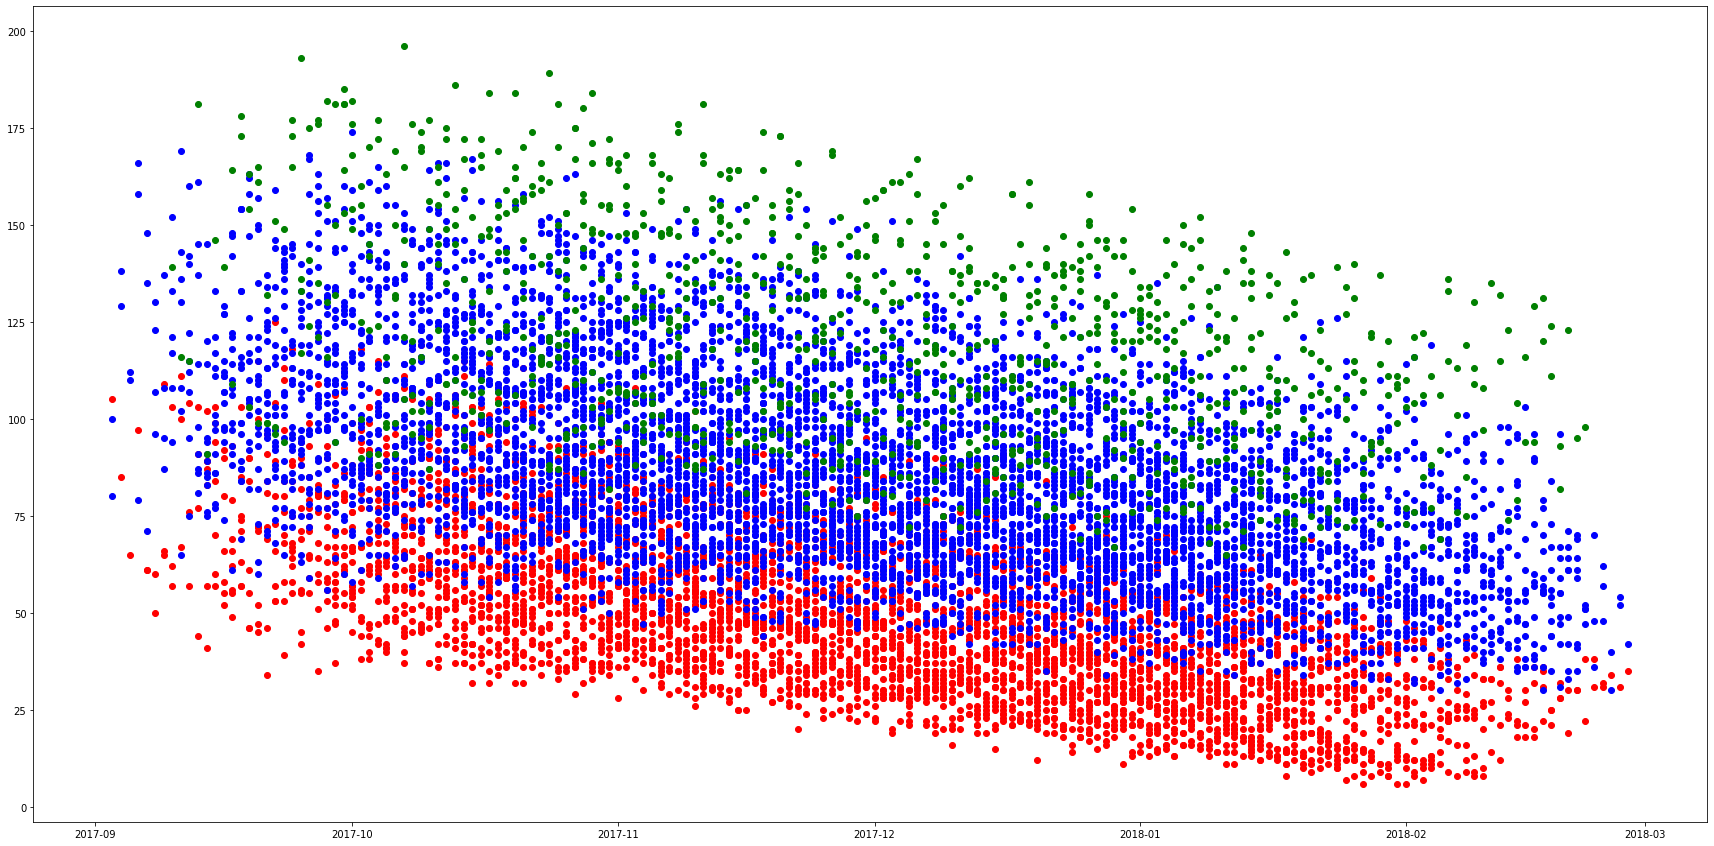

In [258]:
plt.figure(figsize=(30,15))

for i in l1:
    plt.scatter(df[df['video_id']==i]['date'], df[df['video_id']==i]['count'], c='r')

for i in l2:
    plt.scatter(df[df['video_id']==i]['date'], df[df['video_id']==i]['count'], c='b')
    
for i in l3:
    plt.scatter(df[df['video_id']==i]['date'], df[df['video_id']==i]['count'], c='g')    
    

In [284]:
df1= pd.DataFrame(l1) #else

In [285]:
df2 = pd.DataFrame(l2) #stabel

In [286]:
df3 = pd.DataFrame(l3)#hot 

In [287]:
df1 = pd.merge(left=df, right=df1, how='inner', left_on='video_id', right_on=0)
df2 = pd.merge(left=df, right=df2, how='inner', left_on='video_id', right_on=0)
df3 = pd.merge(left=df, right=df3, how='inner', left_on='video_id', right_on=0)


In [300]:
df3.groupby('video_id').max()[['video_length','video_quality']]

,video_length,video_quality
video_id,,
4,15,720
44,17,1080
51,18,1080
52,17,1080
57,15,1080
74,15,720
82,15,720
84,15,720
93,18,1080
